#### [엔화 환율과 일본 방문객 수의 상관관계 분석 ]

- 데이터셋 : 
    * 2017년 1월~2023년 12월까지 월별 여객기 이용자수 및 항공편수 (한국공항공사)
    * 2017년 1월~2023년 12월까지 JPY-KRW 월별 환율데이터
    (investing.com)
- 엔화 환율과 일본 방문객 수의 상관관계 분석
    1. 2017년 01월 ~ 2023년 12월
    2. 2020년 03월 ~ 2023년 04월 제거:
        - 코로나 입국 제한걸린 기간을 제외
- 과정
    * 데이터파일확인
        - 원본파일을 열어 컬럼명이 첫줄인지 확인
        - 불필요한 컬럼이 있는지 확인

    * 데이터 전처리 및 가공
        - 파일 확인 후 불필요한 부분 처리
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환
        - 분석하고자 하는 새로운 데이터프레임 생성

    * 데이터 분석
        - 데이터를 기반으로 의미를 찾는 탐색적 분석 실시
        - 시각화 및 데이터정리



In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import df_set_customFont as Fot

In [149]:
FILE_PATH=r'C:\Users\KDP15\Desktop\KDT6\EX_PANDAS06\DATA\국제선_지역별_통계_20240724142510.xlsx'
FILE_PATH2=r'C:\Users\KDP15\Desktop\KDT6\EX_PANDAS06\DATA\JPY_KRW 과거 데이터2.csv'

In [150]:
dataDF=pd.read_excel(FILE_PATH)

c:\Users\KDP15\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [151]:
dataDF.head(5)

,지역별(1),2017.01,2017.01.1,2017.01.2,2017.01.3,2017.01.4,2017.01.5,2017.02,2017.02.1,2017.02.2,...,2023.11.2,2023.11.3,2023.11.4,2023.11.5,2023.12,2023.12.1,2023.12.2,2023.12.3,2023.12.4,2023.12.5
0,지역별(1),운항 (편),운항 (편),운항 (편),여객 (명),여객 (명),여객 (명),운항 (편),운항 (편),운항 (편),...,운항 (편),여객 (명),여객 (명),여객 (명),운항 (편),운항 (편),운항 (편),여객 (명),여객 (명),여객 (명)
1,지역별(1),계,도착,출발,계,도착,출발,계,도착,출발,...,출발,계,도착,출발,계,도착,출발,계,도착,출발
2,합계,39335,19681,19654,7001362,3461923,3539439,35502,17748,17754,...,19276,6324825,3109488,3215337,41601,20792,20809,6983564,3453978,3529586
3,일본,9041,4518,4523,1597654,769520,828134,8293,4146,4147,...,5067,1898526,942714,955812,10938,5470,5468,2027853,1019986,1007867
4,중국,10367,5175,5192,1539676,796584,743092,9429,4703,4726,...,3890,737632,373566,364066,8268,4128,4140,819676,395837,423839


In [152]:
dataDF.set_index('지역별(1)',inplace=True)

In [153]:
nulllist=[]
for i in dataDF.columns:
    if i.endswith('.2'):
        nulllist.append(i)

In [154]:
newDF=dataDF[nulllist]

In [155]:
newDF.head(5)   # 운항(편) 출발을 가져옴

,2017.01.2,2017.02.2,2017.03.2,2017.04.2,2017.05.2,2017.06.2,2017.07.2,2017.08.2,2017.09.2,2017.10.2,...,2023.03.2,2023.04.2,2023.05.2,2023.06.2,2023.07.2,2023.08.2,2023.09.2,2023.10.2,2023.11.2,2023.12.2
지역별(1),,,,,,,,,,,,,,,,,,,,,
지역별(1),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),...,운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편),운항 (편)
지역별(1),출발,출발,출발,출발,출발,출발,출발,출발,출발,출발,...,출발,출발,출발,출발,출발,출발,출발,출발,출발,출발
합계,19654,17754,18695,17713,18502,18226,19718,20132,19053,19900,...,14407,15231,16782,16757,18718,19138,18503,19565,19276,20809
일본,4523,4147,4493,4373,4679,4538,4897,4944,4708,4949,...,4083,4070,4397,4316,4795,4864,4647,5003,5067,5468
중국,5192,4726,4799,3999,4023,4021,4473,4577,4454,4548,...,1207,2088,2744,2967,3432,3565,3626,3934,3890,4140


In [156]:
newDF.tail()

,2017.01.2,2017.02.2,2017.03.2,2017.04.2,2017.05.2,2017.06.2,2017.07.2,2017.08.2,2017.09.2,2017.10.2,...,2023.03.2,2023.04.2,2023.05.2,2023.06.2,2023.07.2,2023.08.2,2023.09.2,2023.10.2,2023.11.2,2023.12.2
지역별(1),,,,,,,,,,,,,,,,,,,,,
유럽,1060,996,1138,1175,1240,1312,1388,1378,1357,1369,...,870,946,984,1017,1083,1056,1024,1061,942,940
중동,154,142,168,154,158,144,161,168,160,167,...,163,162,175,166,172,173,166,163,155,158
아프리카,13,12,14,13,13,13,13,14,13,13,...,18,18,21,21,26,23,21,28,29,28
대양주,625,550,548,528,535,531,589,789,594,630,...,525,552,563,398,583,619,590,603,559,609
기타,0,-,0,1,-,2,-,-,-,-,...,-,-,1,-,-,-,-,-,-,-


In [157]:
newDF=newDF.drop('지역별(1)')

In [158]:
newDF.columns=newDF.columns.str.slice(0, -2)

In [159]:
newDF.replace('-',0,inplace=True)

C:\Users\KDP15\AppData\Local\Temp\ipykernel_16584\1957936612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newDF.replace('-',0,inplace=True)


In [160]:
newDF.loc['일본']

2017.01    4523
2017.02    4147
2017.03    4493
2017.04    4373
2017.05    4679
           ... 
2023.08    4864
2023.09    4647
2023.10    5003
2023.11    5067
2023.12    5468
Name: 일본, Length: 84, dtype: object

In [161]:

nulllist1=[]
for i in dataDF.columns:
    if i.endswith('.5'):
        nulllist1.append(i)

In [162]:
newDF2=dataDF[nulllist1]

In [163]:
newDF2=newDF2.drop('지역별(1)')

In [164]:
newDF2.columns=newDF2.columns.str.slice(0, -2)

In [165]:
newDF2.replace('-',0,inplace=True)

C:\Users\KDP15\AppData\Local\Temp\ipykernel_16584\2027275222.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newDF2.replace('-',0,inplace=True)


In [166]:
newDF2=newDF2.T

In [196]:
newDF2

지역별(1),합계,일본,중국,아시아,미주,유럽,중동,아프리카,대양주,기타
2017.01,3539439,828134,743092,1360664,226085,192428,42325,1154,145557,0
2017.02,3270252,764272,770280,1239214,171275,165594,38954,813,119850,0
2017.03,2990389,781272,557309,1127698,189054,187792,40363,701,106200,0
2017.04,3004091,745832,460547,1213592,208241,224165,43290,1053,107371,0
2017.05,2870961,711232,472075,1097980,216663,230408,40101,744,101758,0
...,...,...,...,...,...,...,...,...,...,...
2023.08,3260840,864746,448530,1268206,282288,221683,51848,3244,120295,0
2023.09,3064433,862087,393408,1164424,260974,216799,47805,2830,116106,0
2023.10,3187714,905420,425545,1243439,248632,197548,46240,2566,118324,0
2023.11,3215337,955812,364066,1337897,236130,160622,38898,2597,119315,0


In [167]:
newDF=newDF.T

In [195]:
newDF

지역별(1),합계,일본,중국,아시아,미주,유럽,중동,아프리카,대양주,기타
2017.01,19654,4523,5192,6818,1269,1060,154,13,625,0
2017.02,17754,4147,4726,6038,1143,996,142,12,550,0
2017.03,18695,4493,4799,6205,1330,1138,168,14,548,0
2017.04,17713,4373,3999,6172,1298,1175,154,13,528,1
2017.05,18502,4679,4023,6478,1376,1240,158,13,535,0
...,...,...,...,...,...,...,...,...,...,...
2023.08,19138,4864,3565,7011,1827,1056,173,23,619,0
2023.09,18503,4647,3626,6662,1767,1024,166,21,590,0
2023.10,19565,5003,3934,6978,1795,1061,163,28,603,0
2023.11,19276,5067,3890,6861,1773,942,155,29,559,0


In [168]:
# 환율 데이터를 가져옴
dataDF2=pd.read_csv(FILE_PATH2)

In [169]:
dataDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      84 non-null     object 
 1   종가      84 non-null     float64
 2   시가      84 non-null     float64
 3   고가      84 non-null     float64
 4   저가      84 non-null     float64
 5   거래량     0 non-null      float64
 6   변동 %    84 non-null     object 
dtypes: float64(5), object(2)
memory usage: 4.7+ KB


In [170]:
dataDF2.head(5)

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2017-01-01,10.1990,10.3122,10.4236,10.1605,NaN,-1.14%
1,2017-02-01,10.0735,10.2101,10.2534,9.9201,NaN,-1.23%
2,2017-03-01,10.0229,10.0891,10.1864,9.8714,NaN,-0.50%
3,2017-04-01,10.1907,10.0337,10.5706,9.9812,NaN,1.67%
4,2017-05-01,10.0970,10.2219,10.2649,9.8029,NaN,-0.92%


In [171]:
dataDF2.isna().sum()

날짜       0
종가       0
시가       0
고가       0
저가       0
거래량     84
변동 %     0
dtype: int64

In [172]:
dataDF2.dropna(axis=1,inplace=True)

In [173]:
dataDF2['날짜']=dataDF2['날짜'].map(lambda x: x.replace('-','.'))

In [174]:
dataDF2['날짜']=dataDF2['날짜'].str.slice(0,-3)

In [175]:
dataDF2.set_index('날짜',inplace=True)

In [176]:
newDF3=pd.concat([newDF[['일본']],newDF2[['일본']],dataDF2[['종가']]],axis=1)

In [177]:
newDF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 2017.01 to 2023.12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일본      84 non-null     object 
 1   일본      84 non-null     object 
 2   종가      84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


In [178]:
newDF3.columns=['일본행 운행수','일본행 여행객수','환율(종가)']

In [179]:
newDF3['일본행 운행수']=newDF3['일본행 운행수'].astype('int64')

In [180]:
newDF3['일본행 여행객수']=newDF3['일본행 여행객수'].astype('int64')

In [197]:
newDF3

,일본행 운행수,일본행 여행객수,환율(종가)
2017.01,4523,828134,10.1990
2017.02,4147,764272,10.0735
2017.03,4493,781272,10.0229
2017.04,4373,745832,10.1907
2017.05,4679,711232,10.0970
...,...,...,...
2023.08,4864,864746,9.1037
2023.09,4647,862087,9.0487
2023.10,5003,905420,8.9133
2023.11,5067,955812,8.7670


In [181]:
# 폰트사용
Fot.set_customFont('C:\Windows\Fonts\malgun.ttf')

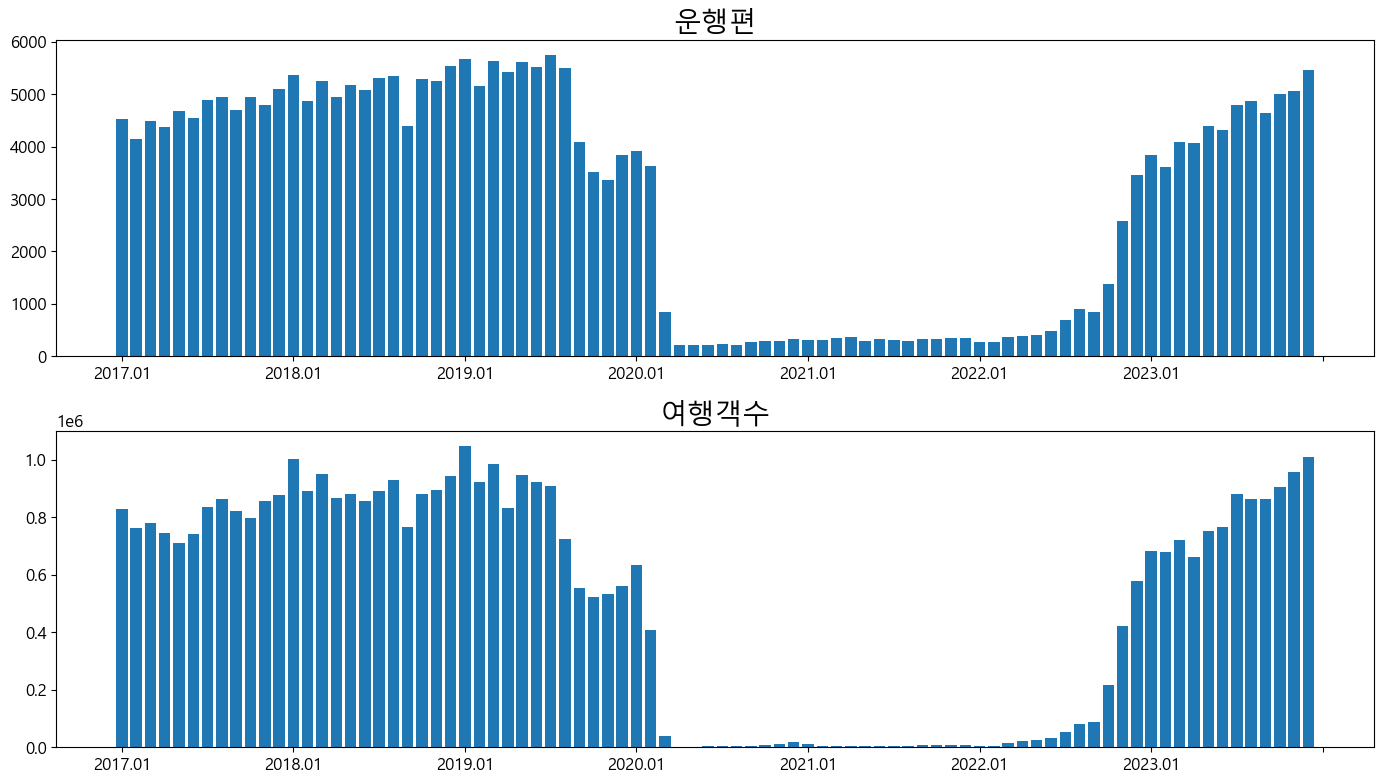

In [198]:
fig=plt.figure(figsize=(14,8))
ax1, ax2=fig.subplots(2,1)

ax1.bar(newDF3['일본행 운행수'].index, newDF3['일본행 운행수'])

#ax2.plot(newDF3['일본행 여행객수'])
ax2.bar(newDF3['일본행 여행객수'].index, newDF3['일본행 여행객수'])

ax1.set_title('운행편', fontsize=20)
ax2.set_title('여행객수', fontsize=20)

total_len = len(newDF3.index)
ax1.set_xticks(np.arange(0, total_len +1, 12))
ax2.set_xticks(np.arange(0, total_len +1, 12))

plt.tight_layout()
plt.show()

In [183]:
newDF3.describe()

,일본행 운행수,일본행 여행객수,환율(종가)
count,84.000000,8.400000e+01,84.000000
mean,3069.476190,5.039829e+05,10.174477
std,2179.110294,3.985236e+05,0.618356
min,214.000000,1.911000e+03,8.767000
25%,353.000000,1.227825e+04,9.780425
50%,4076.500000,6.810085e+05,10.161000
75%,4962.500000,8.653108e+05,10.562300
max,5741.000000,1.046476e+06,11.420700


In [184]:
newDF3.corr()

,일본행 운행수,일본행 여행객수,환율(종가)
일본행 운행수,1.000000,0.991561,-0.34104
일본행 여행객수,0.991561,1.000000,-0.40498
환율(종가),-0.341040,-0.404980,1.00000


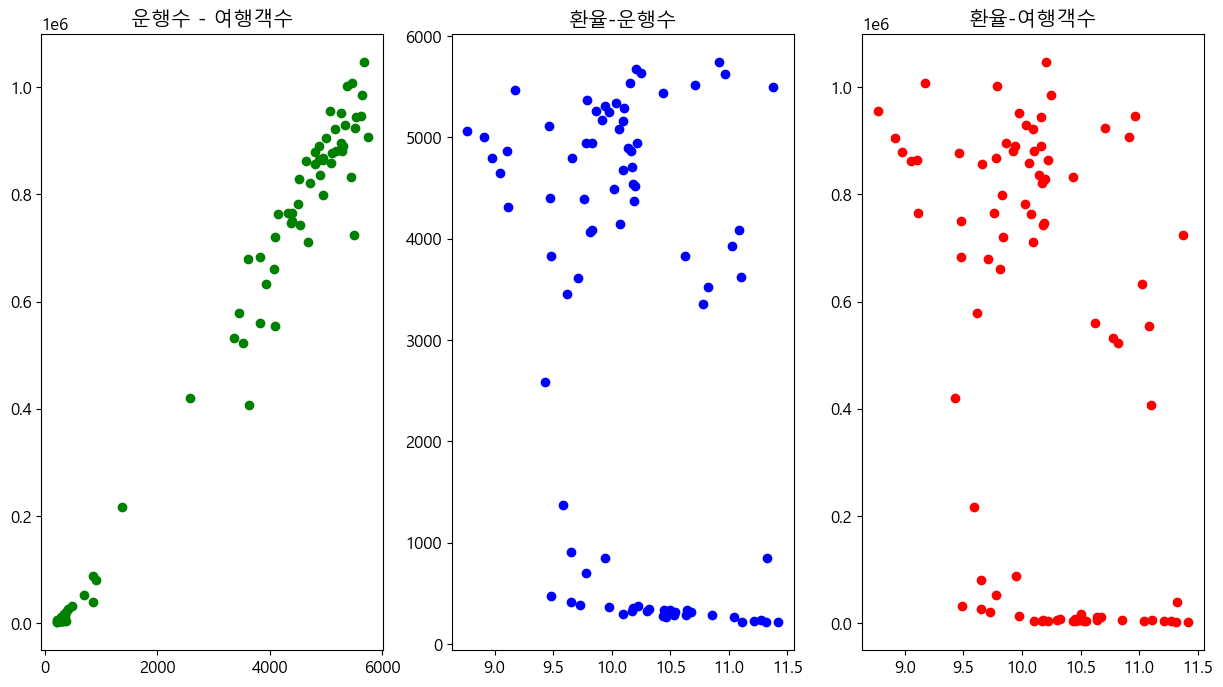

In [185]:
fig=plt.figure(figsize=(15,8))

axs=fig.subplots(1,3)

axs[0].scatter(newDF3['일본행 운행수'],newDF3['일본행 여행객수'], color='Green')
axs[1].scatter(newDF3['환율(종가)'],newDF3['일본행 운행수'], color='blue')
axs[2].scatter(newDF3['환율(종가)'],newDF3['일본행 여행객수'], color='red')

axs[0].set_title('운행수 - 여행객수')
axs[1].set_title('환율-운행수')
axs[2].set_title('환율-여행객수')

plt.show()

## CASE2 [2020.03~2023.04 제거]
    - 코로나 입국제한이 완전히 풀릴때 까지의 기간 삭제

In [186]:
newDF3.index[38:76]

Index(['2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08',
       '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02',
       '2021.03', '2021.04', '2021.05', '2021.06', '2021.07', '2021.08',
       '2021.09', '2021.10', '2021.11', '2021.12', '2022.01', '2022.02',
       '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08',
       '2022.09', '2022.10', '2022.11', '2022.12', '2023.01', '2023.02',
       '2023.03', '2023.04'],
      dtype='object')

In [187]:
newDF4=newDF3.drop(index=newDF3.index[38:76])

In [200]:
newDF4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 2017.01 to 2023.12
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일본행 운행수   46 non-null     int64  
 1   일본행 여행객수  46 non-null     int64  
 2   환율(종가)    46 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.5+ KB


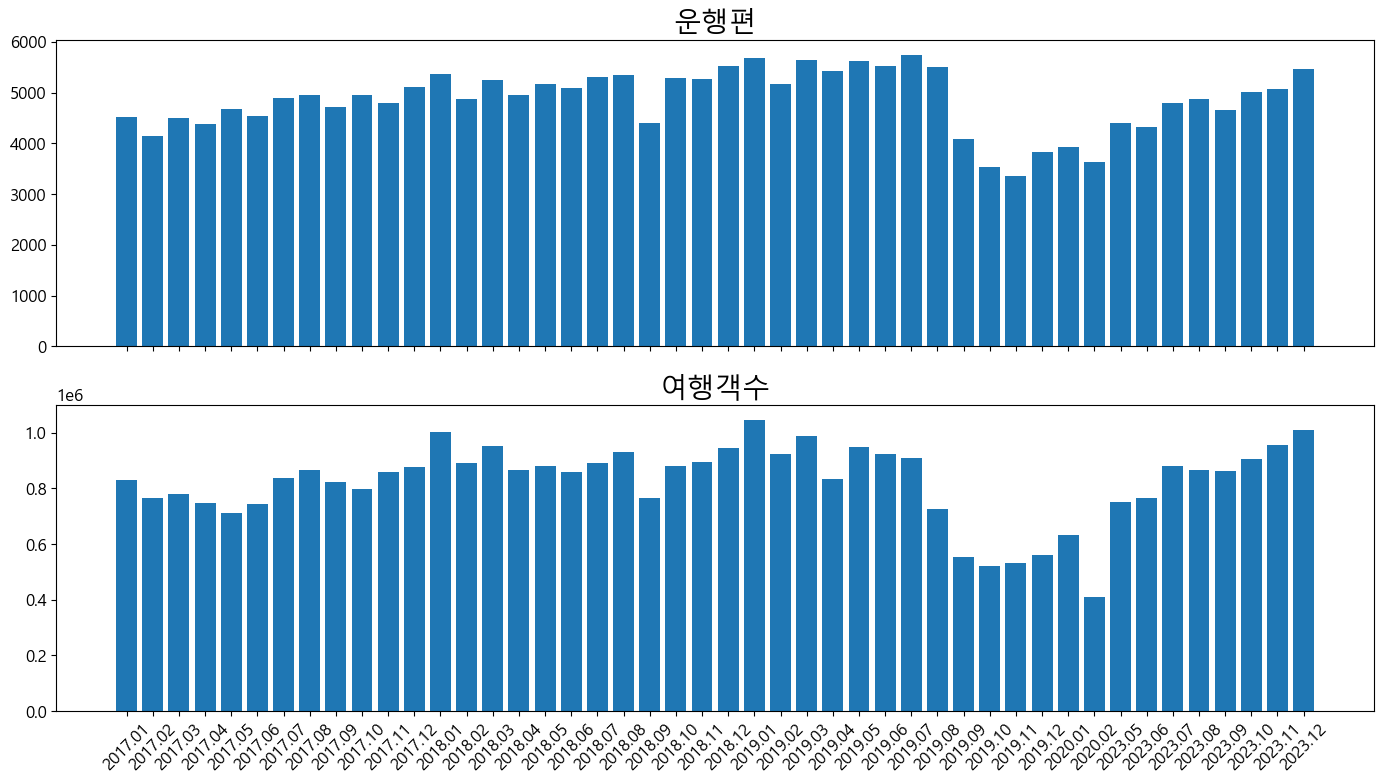

In [201]:
fig=plt.figure(figsize=(14,8))
ax1, ax2=fig.subplots(2,1, sharex=True)

ax1.bar(newDF4['일본행 운행수'].index, newDF4['일본행 운행수'])

#ax2.plot(newDF3['일본행 여행객수'])
ax2.bar(newDF4['일본행 여행객수'].index, newDF4['일본행 여행객수'])

ax1.set_title('운행편', fontsize=20)
ax2.set_title('여행객수', fontsize=20)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [189]:
newDF4.describe()

,일본행 운행수,일본행 여행객수,환율(종가)
count,46.000000,4.600000e+01,46.000000
mean,4850.913043,8.234063e+05,10.060035
std,599.896799,1.386467e+05,0.623885
min,3360.000000,4.079880e+05,8.767000
25%,4500.500000,7.646622e+05,9.782000
50%,4943.500000,8.633715e+05,10.096100
75%,5302.500000,9.068442e+05,10.239750
max,5741.000000,1.046476e+06,11.376000


In [190]:
# 일본행 운행수의 표준편차가 많이 줄어든것을 볼수있다.

In [191]:
newDF4.corr()

,일본행 운행수,일본행 여행객수,환율(종가)
일본행 운행수,1.000000,0.879639,-0.167273
일본행 여행객수,0.879639,1.000000,-0.483922
환율(종가),-0.167273,-0.483922,1.000000


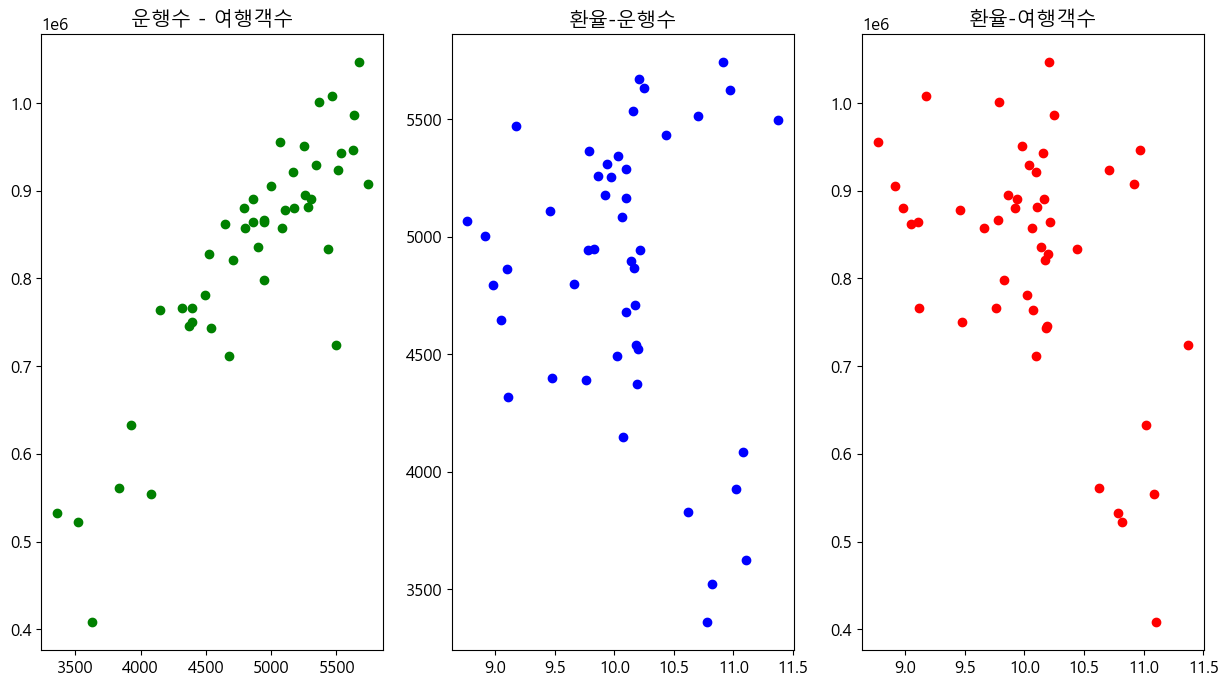

In [192]:
fig=plt.figure(figsize=(15,8))

axs=fig.subplots(1,3)

axs[0].scatter(newDF4['일본행 운행수'],newDF4['일본행 여행객수'],color='Green')
axs[1].scatter(newDF4['환율(종가)'],newDF4['일본행 운행수'], color='blue')
axs[2].scatter(newDF4['환율(종가)'],newDF4['일본행 여행객수'], color='red')

axs[0].set_title('운행수 - 여행객수')
axs[1].set_title('환율-운행수')
axs[2].set_title('환율-여행객수')
plt.show()

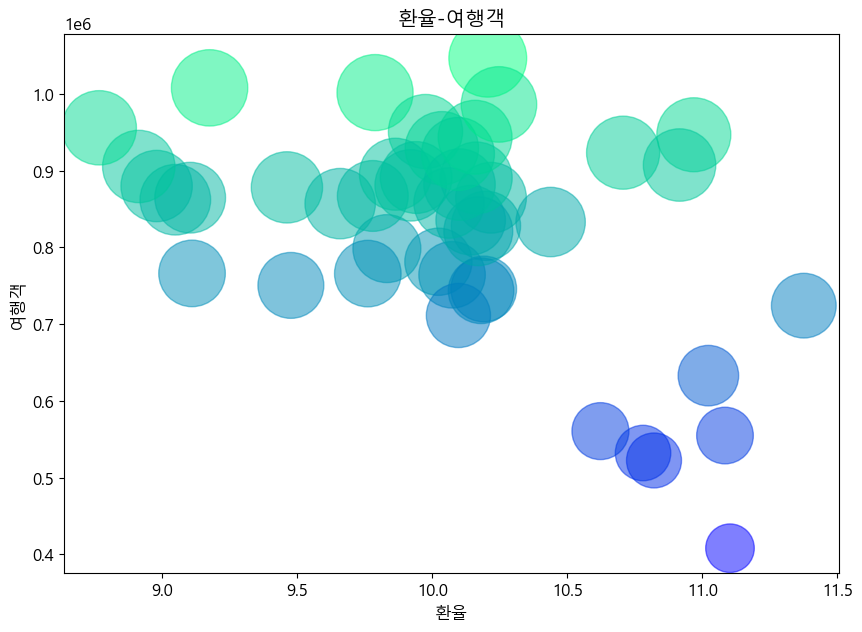

In [193]:
# - 환율와 여행객수 관계 산점도(scatter) 시각화
plt.scatter(newDF4['환율(종가)'],newDF4['일본행 여행객수'], 
            s=newDF4['일본행 여행객수']*0.003, #s는 마커의 크기
            c=[newDF4['일본행 여행객수']],  #c는 마커의 색상
            alpha=0.5,                #alpha는 투명도
            cmap= 'winter'          #문자로 넣을수 있는 cmap
            )          
plt.xlabel('환율')
plt.ylabel('여행객')
plt.title('환율-여행객')
plt.show()


여행객 수가 많을수록 점의 크기가 크게나타난다.

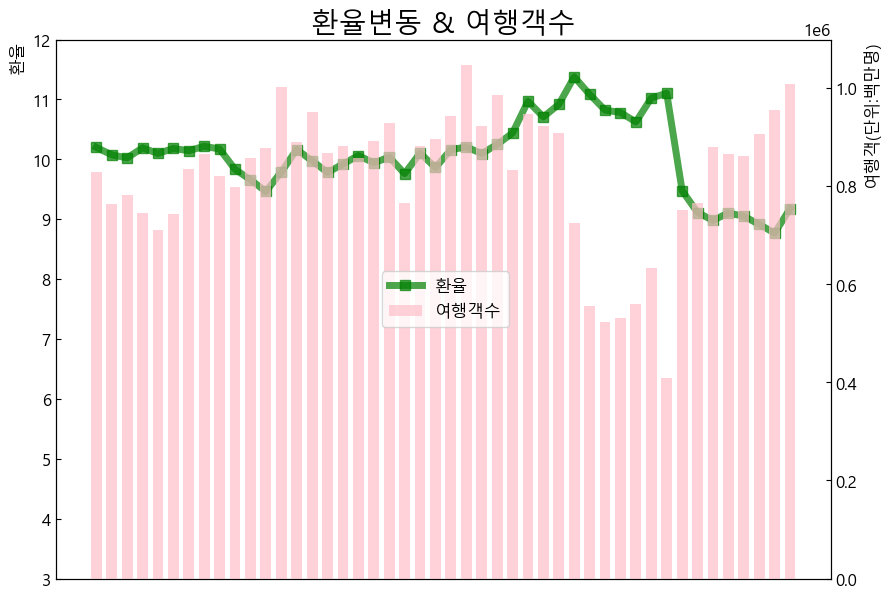

In [194]:

plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['font.size'] = 12

fig, ax1= plt.subplots()

ax1.plot(newDF4.index,newDF4['환율(종가)'],'-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='환율')
ax1.set_ylim(3,12)
ax1.tick_params(axis='both', direction='in')
ax1.set_ylabel('환율',loc='top')

ax2=ax1.twinx()
ax2.bar(newDF4.index,newDF4['일본행 여행객수'], color='pink', alpha=0.7, width=0.7, label='여행객수')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('여행객(단위:백만명)', loc='top')

fig.legend(loc='center')
plt.title('환율변동 & 여행객수',fontsize=20)
plt.xticks([])
plt.show()